<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [40]:
import scipy
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['entropy', 'reciprocal', 'wald', 'gamma', 'zipf', 'randint', 'multinomial', 'pareto', 'rayleigh', 'std', 'vonmises', 'multivariate_normal', 'poisson', 'bartlett', 'beta', 'dirichlet', 'uniform', 'laplace', 'chisquare', 'f', 'logistic', 'norm', 'trapz']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
n = 160
x = 9.57
nu = 9.5
std = 0.4

z_stat = (x-nu)/ (std/np.sqrt(n))
print("Z stat: ", z_stat)
print("Pvalue:",  2 * (1 - stats.norm.cdf(z_stat)))

Z stat:  2.213594362117875
Pvalue: 0.026856695507523787


5. Скорее всего нет...

In [25]:
df = pd.read_table("diamonds.txt")
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [29]:
y = df.price
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
linear = LinearRegression()
forest = RandomForestRegressor(random_state=1)

linear.fit(X_train, y_train)
forest.fit(X_train, y_train)

lin_d = np.abs(y_test - linear.predict(X_test))
for_d = np.abs(y_test - forest.predict(X_test))



((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([-15105.14636008, -10824.7757726 ,  -8839.29300989, ...,
           5523.53373191,   5636.77396851,   6109.97686053])),
 (716.0817017096329, -86.76206212043105, 0.918820603892548))

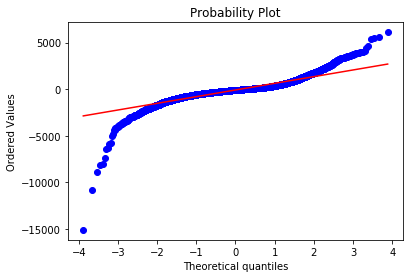

In [47]:
stats.probplot(for_d - lin_d, dist='norm', plot=pylab)

In [49]:
stats.shapiro(lin_d - for_d)

C:\anaconda\lib\site-packages\scipy\stats\morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.845048725605011, 0.0)

In [51]:
stats.ttest_rel(lin_d, for_d)

Ttest_relResult(statistic=12.93081761494892, pvalue=5.074175575650947e-38)

6. Отвергаем, т.к. pvalue << 0.05

In [56]:
DescrStatsW(lin_d - for_d, ).tconfint_mean()

(73.61008769457622, 99.91403654628563)